# Aula 12: Introdução a Deep Learning

### O que é Deep Learning? Como funciona?

Entender melhor como funciona a construção de um modelo preditivo através de Deep Learning

### Sonar: Pedra ou Mina?

O arquivo "sonar.csv" contém 208 padrões obtidos através da emissão de sinais de sonar direcionados a um metal cilíndrico e a uma pedra sob diferentes condições e diferentes ângulos. 

O sinal transmitido é um chilro (chirp, pio) de frequência modulada. A base de dados contém a recepção da transmissão a partir de diferentes ângulos, alvançando 90 graus para o cilindro metálico e 180 graus da pedra.

Cada padrão do sonar é composto por 60 números numa escala de 0.0 a 1.0. Cada número representa a energia captada de cada frequência emitida.

O rótulo associado a cada entrada contém a letra "R" se o objeto for uma pedra e a letra "M" se o objeto for uma mina (cilindro de metal).

In [4]:
import os
import numpy as np
import pandas as pd

### O que é um Tensor? TENSORFLOW

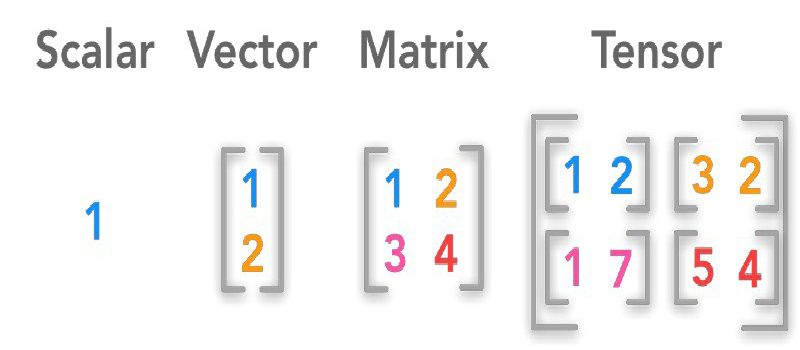

In [27]:
from PIL import Image
i = Image.open("tensor.jpg")
i = i.resize((800,350))
display(i)

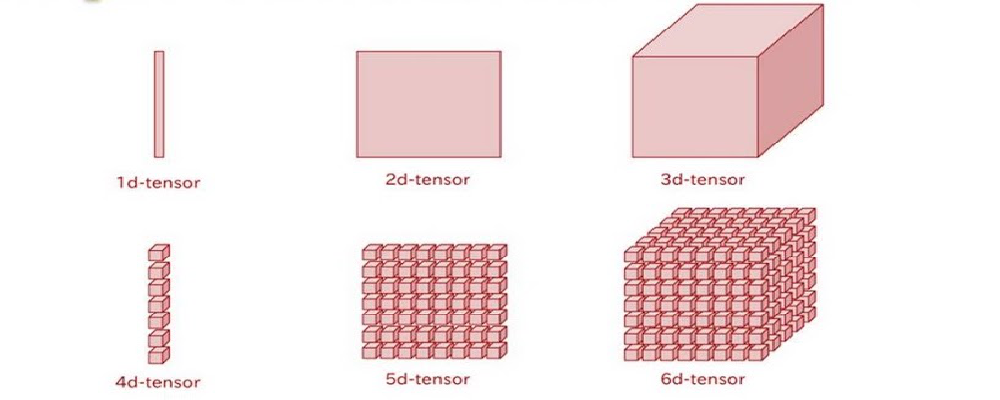

In [17]:
i = Image.open("tensor1.jpg")
i = i.resize((1000,400))
display(i)

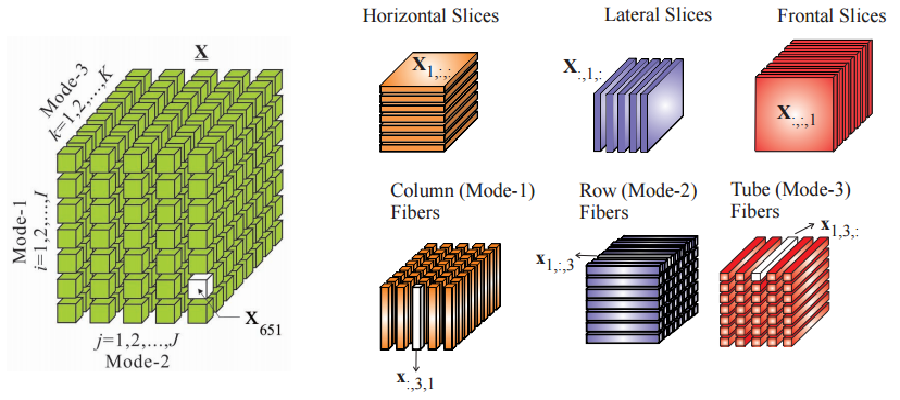

In [22]:
i = Image.open("tensor2.png")
i = i.resize((900,400))
display(i)

Tensor de $3^{a}-$ordem $\underline{X} \in R^{IxJxK}$ com entradas $x_{i,j,k}$

### Mas como funciona uma Deep Neural Network?

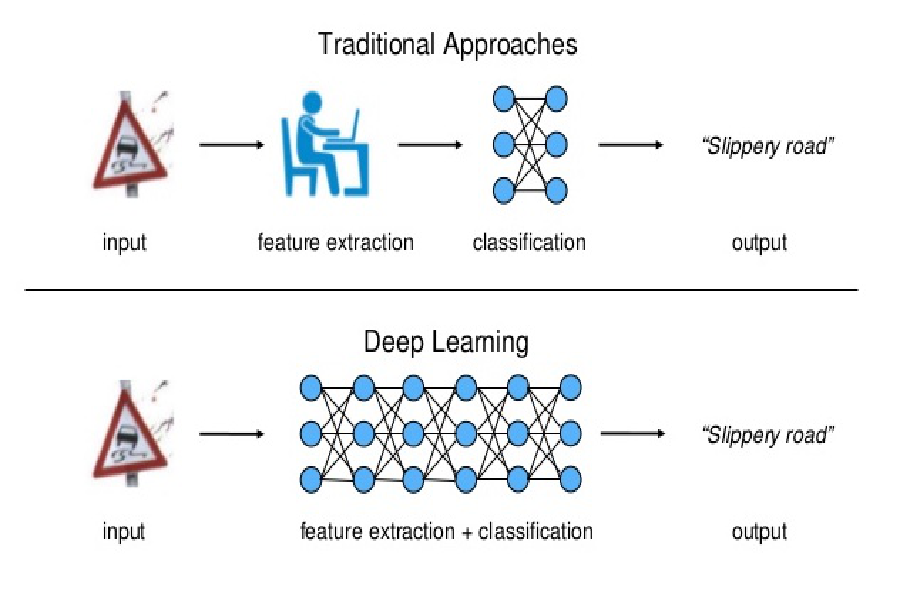

In [28]:
i = Image.open("DNN.jpg")
i = i.resize((900,600))
display(i)

Deep Neural Networks: Treinamento do começo ao fim

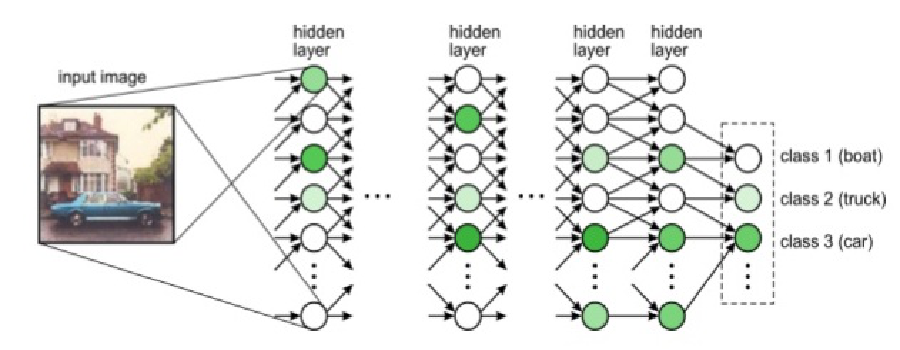

In [32]:
i = Image.open("DNN1.jpg")
i = i.resize((900,350))
display(i)

650 mil neurônios, 60 milhões de parâmetros

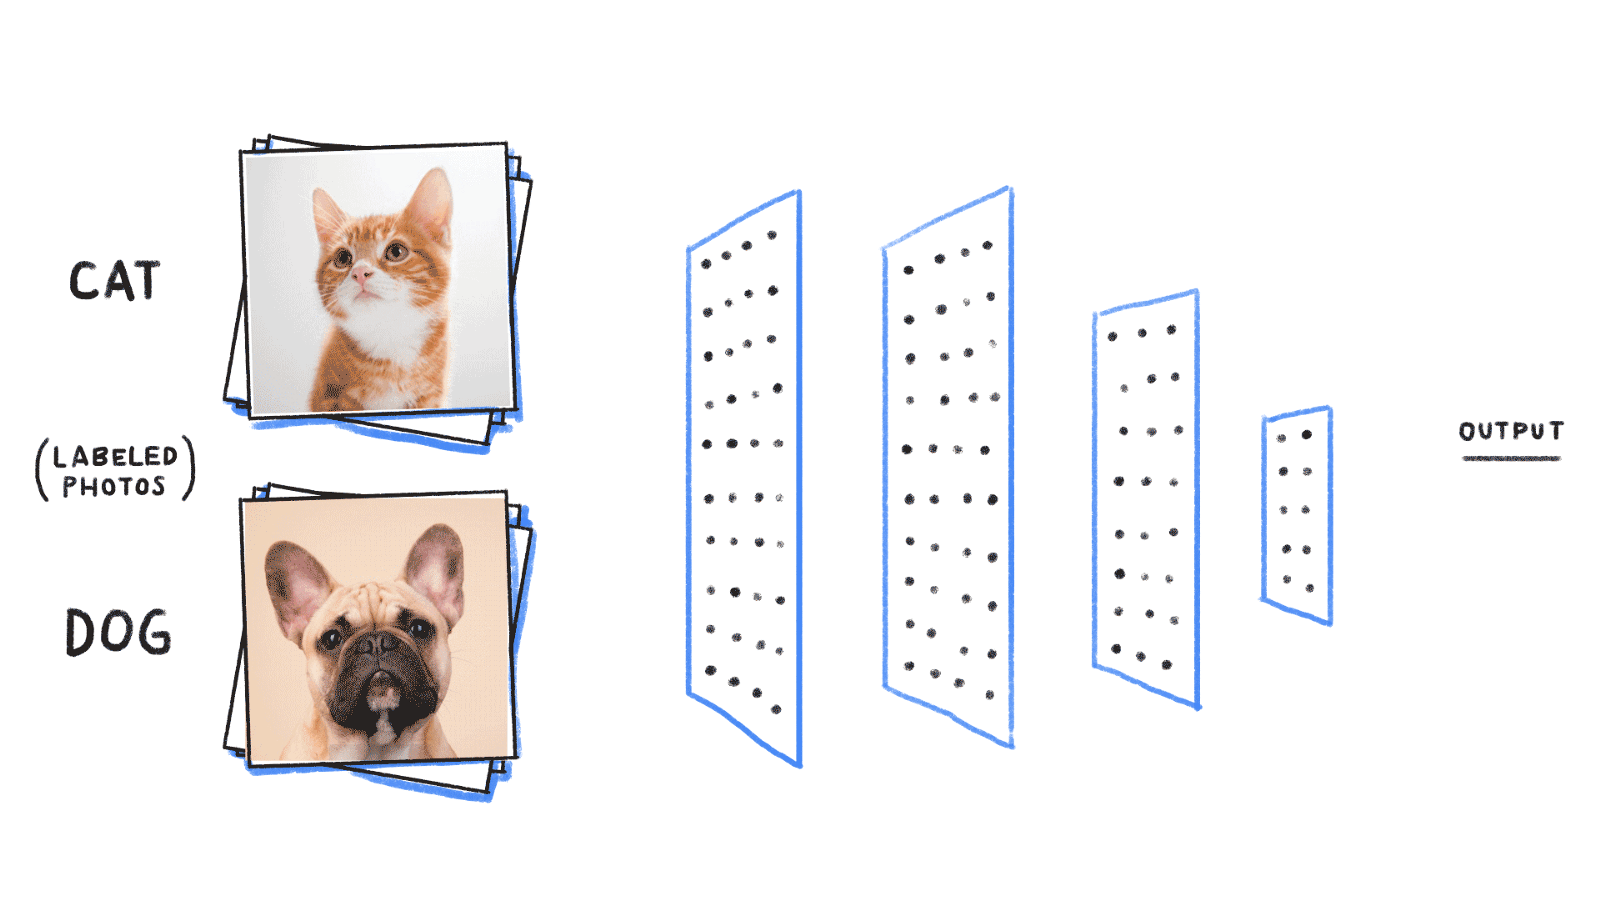

In [38]:
from IPython.display import Image
i = Image(filename="CD.gif")
display(i)

In [ ]:
!pip install tensorflow
!pip install keras

In [2]:
import tensorflow

In [6]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
#from keras.utils import np_utils
from keras import optimizers

In [7]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

Definir uma random seed para replicar os rsultados

In [8]:
seed = 7
np.random.seed(seed)

Carregar a base de dados

In [9]:
dataframe = pd.read_csv("/Users/gustavorsampaio/Documents/Machine & Deep Learning/Deep Learning/sonar/sonar.csv", header=None)

In [10]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [11]:
dataframe[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [12]:
dataset = dataframe.values

In [13]:
dataset

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

Dividir a base de dados em inputs (X) e output (Y)

In [14]:
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [15]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [16]:
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

Codificar a variável classe como inteiro

In [17]:
encoder = LabelEncoder()

In [18]:
encoder.fit(Y)

LabelEncoder()

In [19]:
encoded_Y = encoder.transform(Y)

In [20]:
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Criar Modelo Deep Learning

Criar um modelo sequencial definindo uma lista de camadas para o construtor

A primeira camada em um modelo sequencial precisa receber informação sobre a dimenção do input

A última camada define o número de classes no output. No nosso caso temos uma classificação binária (Pedra ou Mina).

**OBS1.:** Kernel_initializer: Define a forma de pôr os pesos aleatórios iniciais no modelo.

**OBS2.:** Activation: É uma função de transferência utilizada para mapear o output de uma camada para a camada seguinte.

**OBS3.:** Optimizer: String (nome do otimizador) 

 - SGD: Stochastic gradient descent optimizer

 - Adam: Adam optimizer, first-order gradient-based optimization of stochastic objective functions

**OBS4.:** Loss: String (nome da função objetivo) 

 - mean_squared_error
 - mean_absolute_error
 - binary_crossentropy

**OBS5.:** Metrics: Lista de métricas a serem avaliadas pelo modelo durante o treinamento


In [23]:
model = Sequential()

In [24]:
model

In [25]:
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu')) 
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 

In [26]:
model

In [27]:
# Compilar Modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [28]:
model

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5811 (22.70 KB)
Trainable params: 5811 (22.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
estimator = KerasClassifier(build_fn=model, nb_epoch=10, batch_size=5, verbose=1) 

In [31]:
estimator

KerasClassifier(
	model=None
	build_fn=<keras.src.engine.sequential.Sequential object at 0x2a821a190>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	nb_epoch=10
	class_weight=None
)

In [32]:
def create_baseline():
    # Criar Modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu')) 
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 
    # Compilar Modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [33]:
create_baseline()

Avaliar Modelo com a Base de dados

**OBS1.:** Epoch: Uma época é uma completa apresentação da base de dados para o modelo

**OBS2.:** Batch_size: Amostras enviadas ao modelo

In [41]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=1) 

In [38]:
estimator

KerasClassifier(
	model=None
	build_fn=<function create_baseline at 0x2a83656c0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	class_weight=None
)

k-fold cross-validation significa o seguinte:

 - Pegar todos os dados e dividir em K lotes
 - Treinar o modelo em K-1 lotes
 - Validar no último lote
 - Realizar etapas para todas as combinações

**Stratified k-fold** significa olhar para a distribuição inicial de suas classes. Se uma classe aparece mais frequentemente na base de dados, stratified k-fold irá representar este desbalanço ao criar os lotes de dados.

In [42]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)

Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.5187
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.6203
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.6471
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6679 - accuracy: 0.7112
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6207 - accuracy: 0.7487
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5446 - accuracy: 0.7487
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5045 - accuracy: 0.7487
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4538 - accuracy: 0.8075
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4449 - accuracy: 0.7754
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 8ms/step - loss: 0.6925 - accuracy: 0.5348
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6861 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6747 - accuracy: 0.5455
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6494 - accuracy: 0.6150
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5993 - accuracy: 0.6791
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5823 - accuracy: 0.6845
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5289 - accuracy: 0.7540
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.4907 - accuracy: 0.7647
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.4973
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.5936
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.6524
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5765 - accuracy: 0.7647
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5182 - accuracy: 0.7433
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.7807
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4662 - accuracy: 0.7914
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5401
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6813 - accuracy: 0.5401
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6637 - accuracy: 0.5722
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6341 - accuracy: 0.6364
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5813 - accuracy: 0.7059
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5229 - accuracy: 0.7647
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.7701
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4607 - accuracy: 0.7754
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5134
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.5989
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6167 - accuracy: 0.6471
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5462 - accuracy: 0.7166
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5261 - accuracy: 0.7273
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4826 - accuracy: 0.7647
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4797 - accuracy: 0.7914
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 9ms/step - loss: 0.6923 - accuracy: 0.5348
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6751 - accuracy: 0.5775
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6497 - accuracy: 0.5989
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6091 - accuracy: 0.6631
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5480 - accuracy: 0.7433
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4992 - accuracy: 0.7647
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4821 - accuracy: 0.7487
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5265 - accuracy: 0.7380
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.4545
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5455
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6695 - accuracy: 0.6791
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.6738
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7166
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4967 - accuracy: 0.7594
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4687 - accuracy: 0.7968
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4477 - accuracy: 0.7754
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 8ms/step - loss: 0.6928 - accuracy: 0.5455
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.6524
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6783 - accuracy: 0.6845
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6314 - accuracy: 0.6845
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5570 - accuracy: 0.7326
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4973 - accuracy: 0.7861
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4676 - accuracy: 0.7540
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4402 - accuracy: 0.7701
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4038 - accuracy: 0.8075
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 23ms/step - loss: 0.6931 - accuracy: 0.4574
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.5372
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6604 - accuracy: 0.6117
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.6862
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.5542 - accuracy: 0.7287
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4919 - accuracy: 0.7660
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4806 - accuracy: 0.7500
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5053
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6797 - accuracy: 0.5851
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6359 - accuracy: 0.7074
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5932 - accuracy: 0.6755
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5161 - accuracy: 0.7606
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4605 - accuracy: 0.8085
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4382 - accuracy: 0.7766
Epoch 10/10
4/4 [==============================] - 0s 2ms/step


In [43]:
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 75.93% (9.66%)


Separar dados de treinamento e validação

In [40]:
def alicia(ali):
    y = 10*ali
    j = ali/20
    return (y,j)

In [42]:
duda, nanda = alicia(5)

In [43]:
duda

50

In [44]:
nanda

0.25

In [44]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, encoded_Y, test_size=0.20, random_state=seed)
X_train_s, X_test_s, Y_train_s, Y_test_s = model_selection.train_test_split(X, Y, test_size=0.20, random_state=seed)

In [45]:
X_test

array([[0.0123, 0.0309, 0.0169, ..., 0.0092, 0.0009, 0.0044],
       [0.0374, 0.0586, 0.0628, ..., 0.0113, 0.0098, 0.0126],
       [0.0107, 0.0453, 0.0289, ..., 0.006 , 0.0017, 0.0036],
       ...,
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.0201, 0.0165, 0.0344, ..., 0.0105, 0.0082, 0.0036],
       [0.0365, 0.1632, 0.1636, ..., 0.0094, 0.011 , 0.0068]])

In [46]:
X_test_s

array([[0.0123, 0.0309, 0.0169, ..., 0.0092, 0.0009, 0.0044],
       [0.0374, 0.0586, 0.0628, ..., 0.0113, 0.0098, 0.0126],
       [0.0107, 0.0453, 0.0289, ..., 0.006 , 0.0017, 0.0036],
       ...,
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.0201, 0.0165, 0.0344, ..., 0.0105, 0.0082, 0.0036],
       [0.0365, 0.1632, 0.1636, ..., 0.0094, 0.011 , 0.0068]])

In [47]:
Y_test

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [48]:
Y_test_s

array(['R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)

Estimar o modelo com os dados de treinamento

In [49]:
estimator.fit(X_train, Y_train)

Epoch 1/10


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


34/34 [==============================] - 1s 30ms/step - loss: 0.6930 - accuracy: 0.5060
Epoch 2/10
34/34 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5060
Epoch 3/10
34/34 [==============================] - 0s 7ms/step - loss: 0.6877 - accuracy: 0.5120
Epoch 4/10
34/34 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.5361
Epoch 5/10
34/34 [==============================] - 0s 6ms/step - loss: 0.6373 - accuracy: 0.6446
Epoch 6/10
34/34 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.6747
Epoch 7/10
34/34 [==============================] - 0s 6ms/step - loss: 0.5727 - accuracy: 0.6867
Epoch 8/10
34/34 [==============================] - 0s 6ms/step - loss: 0.5190 - accuracy: 0.7651
Epoch 9/10
34/34 [==============================] - 0s 6ms/step - loss: 0.4818 - accuracy: 0.7530
Epoch 10/10
34/34 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 0.7651


KerasClassifier(
	model=None
	build_fn=<function create_baseline at 0x2a83656c0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [50]:
predictions = estimator.predict(X_test)
print(predictions)

9/9 [==============================] - 0s 3ms/step
[1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1]


Transformar o Outcome novamente para a nomenclatura das classes

In [51]:
predictions_encoded = encoder.inverse_transform(predictions)
print(predictions_encoded)

['R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R'
 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M'
 'M' 'M' 'M' 'M' 'R' 'R']


In [52]:
print(accuracy_score(Y_test_s, predictions_encoded))
print(accuracy_score(Y_test, predictions))

0.7142857142857143
0.7142857142857143


In [53]:
from tensorflow.keras.optimizers import SGD

In [54]:
import tensorflow as tf

In [55]:
tf.keras.optimizers.SGD

keras.src.optimizers.sgd.SGD

In [56]:
def create_model1():
    # Criar Modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu')) 
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 
    # Compilar Modelo
    sgd = SGD(lr=0.01) #SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
    return model

In [57]:
estimator1 = KerasClassifier(build_fn=create_model1, epochs=10, batch_size=5, verbose=1) 

In [58]:
estimator1

KerasClassifier(
	model=None
	build_fn=<function create_model1 at 0x301b35b20>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [59]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator1, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10


2023-11-20 12:43:14.528327: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


38/38 [==============================] - 1s 7ms/step - loss: 0.2501 - accuracy: 0.5241
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.5455
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2501 - accuracy: 0.4545
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5027
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2501 - accuracy: 0.5241
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 3ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 0.2500 - accuracy: 0.5401
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 0.2501 - accuracy: 0.4759
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5294
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5294
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5294
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5294
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5294
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5294
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5294
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5294
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 0.2500 - accuracy: 0.4894
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5319
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5319
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 10/10
4/4 [==============================] - 0s 2ms/step


/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 0.2500 - accuracy: 0.5106
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5319
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5319
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 9/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Results: 53.38% (1.62%)


In [60]:
estimator1.fit(X_train, Y_train)

/Users/gustavorsampaio/miniconda3/envs/tensorflow/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
34/34 [==============================] - 1s 9ms/step - loss: 0.2500 - accuracy: 0.4578
Epoch 2/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 3/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 4/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 5/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 6/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 7/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 8/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 9/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060
Epoch 10/10
34/34 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5060


KerasClassifier(
	model=None
	build_fn=<function create_model1 at 0x301b35b20>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [61]:
predictions1 = estimator1.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [62]:
print(accuracy_score(Y_test, predictions1))

0.6428571428571429


In [51]:
def create_model2():
    # Criar Modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu')) 
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 
    # Compilar Modelo
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [52]:
estimator2 = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=15, verbose=1) 
estimator2.fit(X_train, Y_train)
predictions2 = estimator2.predict(X_test)
print(accuracy_score(Y_test, predictions2))

/var/folders/j0/5s6rknpd2j1bczb130mw14cm0000gn/T/ipykernel_88236/2228312228.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator2 = KerasClassifier(build_fn=create_model2, nb_epoch=100000, batch_size=15, verbose=1)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2022-11-21 17:27:44.185268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 126ms/step
0.6428571428571429


2022-11-21 17:27:45.945114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
